In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

# Check if everything is working
print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the dataset

data = pd.read_csv(r"C:\Users\HP\Documents\Projects\sales-prediction-project\train.csv",low_memory=False)
print(data.head())  # View the first few rows
print(data.info())  # Check data types and missing values

   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 n

In [5]:
# Extract Weekday Information

# Convert 'Date' to datetime format if not already
data['Date'] = pd.to_datetime(data['Date'])

# Extract weekday names
data['Weekday'] = data['Date'].dt.day_name()

# Check the updated dataset
print(data[['Date', 'Sales', 'Weekday']].head())

        Date  Sales Weekday
0 2015-07-31   5263  Friday
1 2015-07-31   6064  Friday
2 2015-07-31   8314  Friday
3 2015-07-31  13995  Friday
4 2015-07-31   4822  Friday


In [19]:
# Group sales by weekday

# Calculate total sales for each weekday
weekday_sales = data.groupby('Weekday')['Sales'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
)

weekend_sales = data.groupby('Weekday')['Sales'].mean().reindex(
    ['Saturday', 'Sunday']
)

# Display the results
print(weekday_sales)
print(weekend_sales)

Weekday
Monday       7809.044510
Tuesday      7005.244467
Wednesday    6555.884138
Thursday     6247.575913
Friday       6723.274305
Name: Sales, dtype: float64
Weekday
Saturday    5847.562599
Sunday       204.183189
Name: Sales, dtype: float64


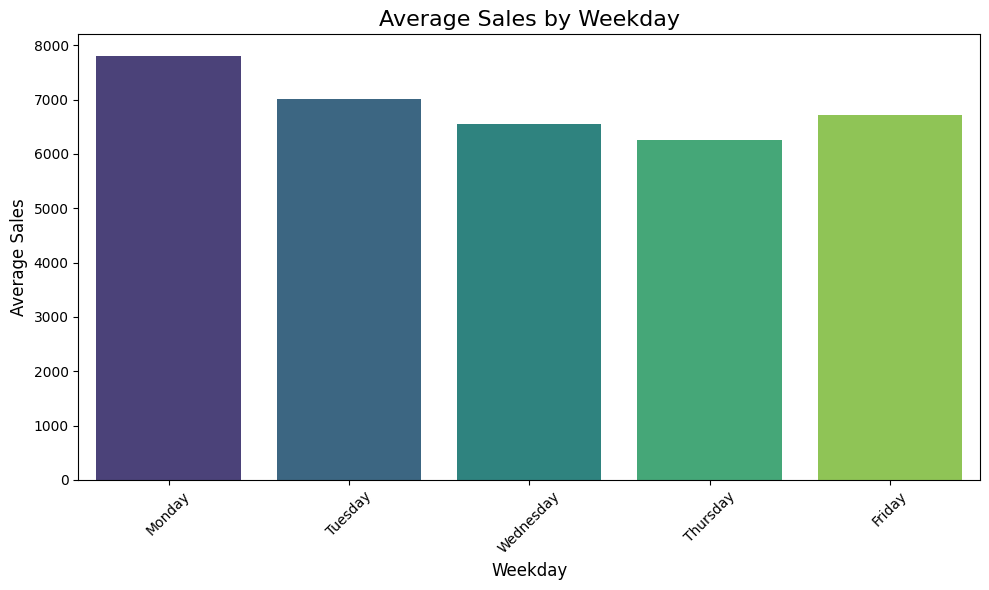

In [17]:
# Visualize Weekday Sales

import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for weekday sales
weekday_sales_df = weekday_sales.reset_index()
weekday_sales_df.columns = ['Weekday', 'Sales']

# Plot with `hue` assigned
plt.figure(figsize=(10, 6))
sns.barplot(data=weekday_sales_df, x='Weekday', y='Sales', hue='Weekday', dodge=False, palette="viridis", legend=False)
plt.title('Average Sales by Weekday', fontsize=16)
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

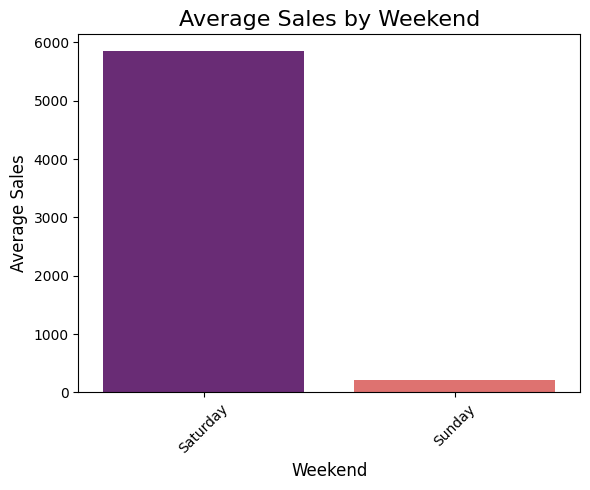

In [28]:
# Visualize Weekend Sales

import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for weekend sales
weekend_sales_df = weekend_sales.reset_index()
weekend_sales_df.columns = ['Weekend', 'Sales']

# Plot 
plt.figure(figsize=(6,5))
sns.barplot(data=weekend_sales_df, x='Weekend', y='Sales', hue='Weekend', dodge=False, palette="magma", legend=False)
plt.title('Average Sales by Weekend', fontsize=16)
plt.xlabel('Weekend', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
# Define weekdays and weekends
data['IsWeekend'] = data['Weekday'].isin(['Saturday', 'Sunday'])

# Calculate average sales for weekdays vs weekends
comparison = data.groupby('IsWeekend')['Sales'].mean()
comparison.index = ['Weekday', 'Weekend']

# Display comparison
print(comparison)

Weekday    6866.806351
Weekend    3025.872894
Name: Sales, dtype: float64


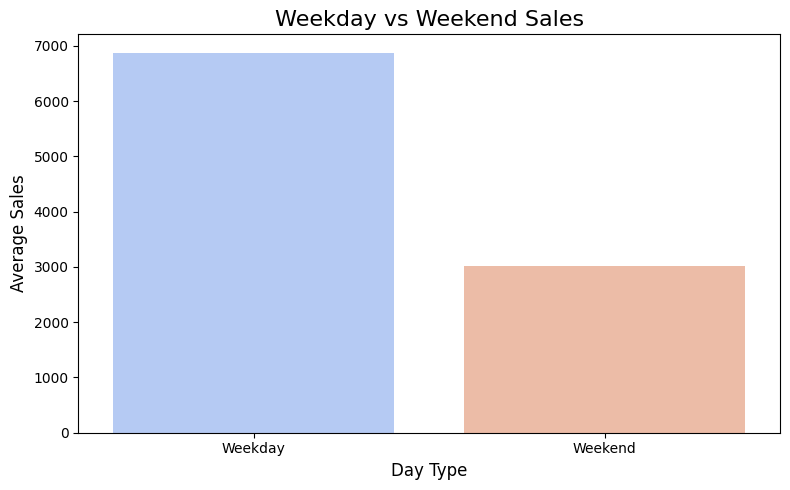

In [30]:
# Weekday vs Weekend Sales comparison

# Convert comparison to a DataFrame 
comparison_df = comparison.reset_index()
comparison_df.columns = ['DayType', 'Sales']

# Plot 
plt.figure(figsize=(8, 5))
sns.barplot(data=comparison_df, x='DayType', y='Sales', hue='DayType', dodge=False, palette="coolwarm", legend=False)
plt.title('Weekday vs Weekend Sales', fontsize=16)
plt.xlabel('Day Type', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.tight_layout()
plt.show()